# Numpy: number crunching in Python

## 1 Motivation

### 1.1 Review: built-in numerics

Python has built-in numeric datatypes, e.g.:
- integers (`int`)
- floating point numbers (`float`)

#### 1.1.1 `int`: integer numbers

* literals: `42`, `1`, `-15`
* no hard maximum value (e.g. `10**1000` is perfectly valid)
* dynamic size, memory overhead, cannot directly use native CPU instructions for basic math
* $\Rightarrow$ very flexible, but often not very efficient
* typical integer datatypes in C: `int`, `unsigned int`, `long int`

#### 1.1.2 `float`: floating point numbers

* floating point number: $\textrm{sign} * \textrm{mantissa} * \textrm{base}^\textrm{exponent}$, e.g. $-1.234\cdot10^{2}$
* literals in Python: `0.0`, `314.15`, `-1.5e7` (meaning $-1.5\cdot10^{7}$)
* usually implemented as `double` in C (64 bit / 8 byte)
* thus, limited max, min, eps (see [`sys.float_info`](https://docs.python.org/3/library/sys.html#sys.float_info))

### 1.2 What about arrays?

#### 1.2.1 Why we need arrays?

* $N$-dimensional arrays of numerical data are essential for data analysis and scientific computing
    - Natural sciences & numerical mathematics
        - Vectors, matrices, tensors
    - Data Science
        - Datasets (e.g. via Pandas), tensors

- Linear algebra
    - Matrix-vector multiplication, matrix-matrix multiplication
- Statistics with large datasets
    - Aggregating data for computing mean, standard deviation, ...
- Deep learning:
    - Operations involving high-dimensional arrays ("tensors")

#### 1.2.2 Why not use Python's builtin container types (`list`, `tuple`)?

- Can hold *any type* of Python object
    - (Mostly?) Not suitable for native CPU instructions
    - Agnostic of concept of e.g. a rectangular array
- Not designed with numerical calculations in mind

Not efficient enough to be used for "number crunching".

* native Python does not provide an efficient and convenient realization of $N$-dimensional arrays of numerical data.

- Efficient libraries for arrays exist in C/C++ and Fortran
    - BLAS and LAPACK
    - FFTW
- We want to access these libraries from Python!
    - Python provides "ease of use"
    - compiled programming languages provide efficient, speedy numerics

#### 1.2.3 NumPy

In [2]:
import numpy as np  # `as np` is convention.

##### 1.2.3.1 Why learn Numpy?

NumPy is the foundation of the Scientific Python stack. Key features of NumPy include:

* `ndarray` type: N-dimensional arrays with compact and efficient data representation in memory
* NumPy `ndarray`s are multi-dimensional (, fixed-size) containers of items of the same *size* and *type*
* convenient interface for programmers to access/modify data and metadata
    * dimension
    * shape
    * numerical data type

Numpy is used for:
* basic scientific computing routines:
    * matrix-matrix multiplication
    * fourier transform
    * basic statistics
* common input/output interface and "inner workings" of many scientific Python libraries
    * SciPy
    * Pandas
    * Matplotlib

##### 1.2.3.2 Speed comparison

`np.ndarray`s are *much* faster than Python built-in containers for numeric calculations

Make list of squares (we will see details for creation and working with numpy arrays later on):

In [2]:
squares = [i ** 2 for i in range(11)]
squares

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81, 100]

In [3]:
squares_np = np.arange(11) ** 2
squares_np

array([  0,   1,   4,   9,  16,  25,  36,  49,  64,  81, 100])

Now, let's test the time for creation of such a list/array:

In [4]:
%timeit [i ** 2 for i in range(10_000)]
%timeit np.arange(10_000) ** 2

2.72 ms ± 301 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
8.9 µs ± 310 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


Now, we can also test the time for summation of a list of squares:

In [5]:
squares = [i ** 2 for i in range(10_000)]
squares_np = np.arange(10_000) ** 2

First, consistency check:

In [6]:
sum(squares), sum(squares_np)

(333283335000, 333283335000)

Time:

In [7]:
%timeit sum(squares)

68.2 µs ± 2.63 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [8]:
%timeit sum(squares_np)

595 µs ± 8.16 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


This is a strange result ...

... let's try another way, a sum within numpy:

In [9]:
sum(squares), sum(squares_np), squares_np.sum()

(333283335000, 333283335000, 333283335000)

In [10]:
%timeit squares_np.sum()

3.27 µs ± 283 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


This is way more faster. Thus, it seems that we have to pay attention, which methods we are using when dealing with numpy arrays.

**Conclusion:** arithmetics with numpy arrays can be 10 to 1000 times faster than using `list`or `tuple`. 

## 2 Creating NumPy [`ndarray`s](https://numpy.org/doc/stable/reference/arrays.ndarray.html)

NumPy `ndarray`s are multi-dimensional (, fixed-size) containers of items of the same *size* and *type*. They...
- can be created from Python containers
- store useful metadata (shape, dtype, memory layout)
- can also be created efficiently by passing a shape
- provide a large speed-up over built-in python

### 2.1 NumPy data types ([dtype](https://numpy.org/doc/stable/reference/arrays.dtypes.html))

Each `np.ndarray` has a data type (`dtype`) for its elements.
* there are different numeric `dtype`s
* can be set, read, and typecast
* this has implications for memory usage
* unlike Python, we might see *overflows*

#### 2.1.1 NumPy numeric dtypes

NumPy has *numeric* types for...
* `bool`eans
* `int`egers (signed or unsigned)
* `float`s

A (more) complete list of supported data types for `ndarray`s can be found [here](https://numpy.org/doc/stable/user/basics.types.html). The tables also feature the corresponding C datatype. *Note*: There are *platform dependent* datatypes (e.g. `np.intc`) where the corresponding C type (e.g. `int`) is also platform dependent.

#### 2.1.2 Setting dtypes

Numpy will "do its best" to use a fitting `dtype`.
* deduces the type of the elements from the input
* will typecast to a fitting `dtype`
* but the `dtype` can also be passed explicitly
    * during construction
    * explicit typecasting with `.astype`

### 2.2 Creation from Python's built-in container types

`ndarray`s can easily be constructed from Python lists or tuples
* `set` and `dict` don't work well
* generators don't work at all!
    * `ndarray`s need their size at **creation time**
    * can use `np.fromiter()` to convert them (needs `dtype`)
* *nested* lists or tuples create multi-dimensional arrays
    * all sublists must have the same size!

In [11]:
a = np.array([1, 2, 3])
f'{a = }, {type(a) = }'

"a = array([1, 2, 3]), type(a) = <class 'numpy.ndarray'>"

In [12]:
b = np.array((1, 2, 3))
f'{b = }, {type(b) = }'

"b = array([1, 2, 3]), type(b) = <class 'numpy.ndarray'>"

In [13]:
np.array(i**2 for i in range(5))

array(<generator object <genexpr> at 0x7ff2f4315690>, dtype=object)

In [14]:
np.fromiter((i**2 for i in range(5)), dtype=int)

array([ 0,  1,  4,  9, 16])

Nested lists:

In [15]:
nested_list = [[1, 2, 3, 4], [10, 20, 30, 40]]
c = np.array(nested_list)
print(f'{c = }')

c = array([[ 1,  2,  3,  4],
       [10, 20, 30, 40]])


In [16]:
nested_list = [[1, 2, 3, 4], [10, 20, 30]]
c = np.array(nested_list)
print(f'{c = }')

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

### 2.3 Accessing metadata

arrays store their data, but also their *metadata* as attributes:
- `shape`: number of dimensions and items
    - N-tuple with non-negative integer values describing the sizes of each dimension
- `dtype`: type of all items
- `itemsize`: memory size per element
- `data`: pointer to start of actual values
- `flags`: `dict` of various settings (e.g. mutability)

In [ ]:
e = np.array([[1.0] * 5, [4] * 5])

print(
    f'''
{e = },
{e.shape = },
{e.size = },
{e.dtype = },
{e.itemsize = }
'''
)


e = array([[1., 1., 1., 1., 1.],
       [4., 4., 4., 4., 4.]]),
e.shape = (2, 5),
e.size = 10,
e.dtype = dtype('float64'),
e.itemsize = 8



In [ ]:
e = np.array([[1.0] * 5, [4] * 4])

print(
    f'''
{e = },
{e.shape = },
{e.size = },
{e.dtype = },
{e.itemsize = }
'''
)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

**Setting data types**

In [ ]:
a = np.array([1, 2, 3])
f'{a = },      {a.dtype = }'

"a = array([1, 2, 3]),      a.dtype = dtype('int64')"

In [ ]:
b = np.array([0.1, 0.55, 9.9])
f'{b = }, {b.dtype = }'

"b = array([0.1 , 0.55, 9.9 ]), b.dtype = dtype('float64')"

In [ ]:
c = a + b
f'{c = }, {c.dtype = }'

"c = array([ 1.1 ,  2.55, 12.9 ]), c.dtype = dtype('float64')"

In [ ]:
a = np.array([1., 2, 3])
f'{a = },      {a.dtype = }'

"a = array([1., 2., 3.]),      a.dtype = dtype('float64')"

In [ ]:
a = np.array([1, 2, 3], dtype=np.float32)
a

array([1., 2., 3.], dtype=float32)

In [ ]:
a = np.array([1, 2, 3])
a, a.astype(np.float32)

(array([1, 2, 3]), array([1., 2., 3.], dtype=float32))

In [ ]:
b

array([0.1 , 0.55, 9.9 ])

In [ ]:
b.astype(np.int64)

array([0, 0, 9])

In [ ]:
b.astype(np.bool8)

/tmp/ipykernel_27830/576009801.py:1: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  b.astype(np.bool8)


array([ True,  True,  True])

In [ ]:
b.astype(np.int64).astype(np.bool8)

/tmp/ipykernel_27830/485872366.py:1: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  b.astype(np.int64).astype(np.bool8)


array([False, False,  True])

### 2.4 Creation from NumPy built-in functions (factory functions)

Numpy provides some factory functions for generating arrays:
* range-like: give a `start` and a `stop`, like Python `range`
* by shape: pass a shape (dimensions), may fill with different values
* copy the shape from an existing array

#### 2.4.1 Range-like array construction

Python `range` has Integer `start`, `stop`, and `step`. Numpy has range-inspired factory functions:
* `np.arange`: array with start, end, and step (like python `range`)
* `np.linspace`: span `num` points evenly between `start` and `stop`
* `np.logspace`: likewise, but logarithmically between powers of 10

In [ ]:
np.arange(10)

In [ ]:
np.arange(3, 11, 2)

In [ ]:
np.linspace(start=0, stop=100, num=10)

In [ ]:
np.linspace(0, 100, 10, endpoint=False)

#### 2.4.2 Shape-based array construction

* `np.zeros`: array with zeros of given `shape` (and `dtype`)
* `np.ones`: likewise, filled with ones
* `np.full`: likewise, filled with arbitrary value
* `np.eye`: $n\times n$ matrix filled with ones on the "diagonals", zero otherwise.
* `np.diag`: Fill a square 2D array with given values on the diagonal

In [ ]:
np.zeros((2, 3)), np.ones((3, 2))

In [ ]:
np.full((2, 2), fill_value=3)

In [ ]:
np.eye(3)

In [ ]:
np.diag(np.arange(1, 4), k=-1)

#### 2.4.3 Copy shape from existing arrays

These all need an input array to take its shape
* `np.zeros_like`: initialize with zeros
* `np.ones_like`: initialize with ones
* `np.full_like`: initialize with arbitrary value

In [ ]:
one = np.ones((3, 3))

np.zeros_like(one), np.full_like(one, fill_value=5)

### 2.5 Tasks 

##### **1.** Create an `ndarray` named `a` with all odd integers between 0 and 10, in order.

In [ ]:
odd = np.arange(1, 10, 2)
odd

array([1, 3, 5, 7, 9])

##### **2.** Create an `ndarray` named `i_5` with the $5\times5$ unit matrix.

In [ ]:
i_5 = np.eye(5)
i_5

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

##### **3.** Create an `ndarray` named `g` with a $5\times5$ grid spanning the points of a unit square (with corners at `[0, 0], [0, 1], [1, 0], [1, 1]`)

In [ ]:
g = np.linspace(np.linspace([0, 0], [1, 0], 5), np.linspace([0, 1], [1, 1], 5), 5)
g

array([[[0.  , 0.  ],
        [0.25, 0.  ],
        [0.5 , 0.  ],
        [0.75, 0.  ],
        [1.  , 0.  ]],

       [[0.  , 0.25],
        [0.25, 0.25],
        [0.5 , 0.25],
        [0.75, 0.25],
        [1.  , 0.25]],

       [[0.  , 0.5 ],
        [0.25, 0.5 ],
        [0.5 , 0.5 ],
        [0.75, 0.5 ],
        [1.  , 0.5 ]],

       [[0.  , 0.75],
        [0.25, 0.75],
        [0.5 , 0.75],
        [0.75, 0.75],
        [1.  , 0.75]],

       [[0.  , 1.  ],
        [0.25, 1.  ],
        [0.5 , 1.  ],
        [0.75, 1.  ],
        [1.  , 1.  ]]])

##### **4.** Write a function `hilbert` that creates the Hilbert matrix $H_{ij} = \frac{1}{i+j-1}$ in `n` dimensions.

In [ ]:
def hilbert(n):
    return np.fromfunction(lambda i, j: 1 / (i + j + 1), (n, n))

hilbert(2)

array([[1.        , 0.5       ],
       [0.5       , 0.33333333]])

In [ ]:
def hilbert(n):
    return np.array([[1 / (i + j + 1) for j in range(n)] for i in range(n)])

## 3 Array operations

**Array-oriented programming** is a paradigm that seeks to benefit from vectorization, broadcasting, and direct operations on arrays.
- use `numpy` built-in functions and methods of `ndarray` class
- *avoid* using standard Python loop contructs ("raw" for loops, list comprehension)

### 3.1 Element-wise operations

`ndarray`s redefine methods for arithmetics known from basic Python. Operations are performed element-wise and with broadcasting (we will discuss later) to allow arithmetics on arrays of various dimensions.

#### 3.1.1 Arithmetics

The "standard Python" operators may be used with arrays

* performed element-wise
* `a + b` is analogous to `[i + j for i, j in zip(a, b)]`
    * likewise with other operations
* these vectorized operations are *much* faster

In [4]:
three = np.arange(1, 4)
three

array([1, 2, 3])

In [ ]:
three + three

array([2, 4, 6])

In [ ]:
three * three

array([1, 4, 9])

In [ ]:
three / three

array([1., 1., 1.])

**Reminder:** this behavior is completly different for `list`s

In [5]:
python_list = [1,2,3]
python_list + python_list

[1, 2, 3, 1, 2, 3]

We can do element-wise **relations** as well:

In [ ]:
three == three * three

array([ True, False, False])

In [ ]:
three > three / three

array([False,  True,  True])

In principle, we can do a element-wise operation also by an iteration:

In [ ]:
[i*j for i, j in zip(three, three)] 

[1, 4, 9]

But looking at times:

In [ ]:
size = 10_000
arange = np.arange(size)
%timeit [i * j for i, j in zip(arange, arange)]
%timeit arange * arange

1.19 ms ± 11.4 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
4.66 µs ± 99.2 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


#### 3.1.2 General elementwise operations: `ufunc`s

Universal functions (ufuncs) perform function operations on individual elements of `ndarray`s in an element-by-element manner.

* have broadcasting built-in (see later)
* can be passed additional keyword arguments to specify `dtype`s, typecasting, memory order, or axes
* create a new (temporary) target array
    * can use `out=` parameter to write to an existing array
* see the [documentation](https://numpy.org/doc/stable/reference/ufuncs.html) for details.

**List of `ufunc`s provided by numpy**

There are more than 60 universal functions. Some overload builtin Python operators.

* arithmetics (as seen above)
    * `np.add`, `.subtract`, `.multiply`, etc. overload `+`, `-`, `*`, etc.
* comparison
    * `np.equals`, `np.greater`, etc. overload `==`, `>`, etc.
* bitwise operators
    * `np.bitwise_and`, `np.bitwise_or`, `np.bitwise_xor`, `np.bitwise_not` overload `&`, `|`, `^`, `~`
* logical operators
    * `np.logical_and`, `np.logical_or`, `np.logical_xor`, `np.logical_not`
    * important for Boolean masking: `np.logical_and` and `np.bitwise_and` are the same and thus `&`can be used (similar for the other logical operators) 

In [ ]:
a = np.arange(5)
b = np.arange(-4,5,2)
a, b

In [ ]:
np.logical_and(a,b) 

In [ ]:
np.bitwise_and(a,b)

In [ ]:
a > 1

In [ ]:
a < 4

In [ ]:
(a > 1) & (a < 4)

Other `ufunc`s perform **mathematical** or **numeric** functions.
* exponential functions
    * `np.exp`, `np.exp2`, `np.expm1`, `np.logaddexp`
    * `np.log`, `np.log2`, `np.log1p`, `np.log10`
* trigonometric functions
    * `np.sin`, `np.arccos`, `np.tanh`, `np.arctanh2`, etc.
* numerics
    * `np.isfinite`, `np.isinf`, `np.isnan`
    * `np.clip`, `np.floor`, `np.ceil`, `np.trunc`
    * `np.around`, `np.rint`
* other common mathematical functions
    * `np.sqrt`, `np.square`, `np.cbrt`, `np.abs`, `np.conj`, `np.angle`

In [ ]:
a = np.arange(9)
np.power(2, a, out=a)  # no temporary array
a

In [ ]:
a = np.array([np.arange(3),np.arange(3,6),np.arange(6,9)])
np.power(2, a, out=a)  # no temporary array
a

A useful resource on universal functions can be found [here](https://jakevdp.github.io/PythonDataScienceHandbook/02.03-computation-on-arrays-ufuncs.html).

### 3.2 Broadcasting

#### 3.2.1 Broadcasting: scalars to `ndarray`

Operations with scalars can be broadcast over the whole array.
* operation will be applied to each array element with the scalar
* vectorization saves time
    * much faster than generating redundant information first
    * also faster than using redundant information

In [18]:
three * 3

array([3, 6, 9])

**Reminder:** different behavior for `list`s:

In [21]:
python_list * 3

[1, 2, 3, 1, 2, 3, 1, 2, 3]

Also possible for adding a scalar, which makes mathematicaly no sense:

In [22]:
three + 5

array([6, 7, 8])

In [6]:
six = np.array([[1, 2, 3], [4, 5, 6]])
six, six + 1

(array([[1, 2, 3],
        [4, 5, 6]]),
 array([[2, 3, 4],
        [5, 6, 7]]))

#### 3.2.2 Broadcasting: `nd` to `nd`

In fact, numpy will attempt to broadcast values of *any* shape together to "make things fit":
1. The shape of the array with fewer dimensions is padded with ones from the left
2. All dimensions of length one are expanded to match the dimensions of the other array
* if that doesn't work, an error is raised
* even expansion of one dimension from one array and another dimension from the second will work (this is akin to the "outer product")
* we can generate a new axis with slicing and `np.newaxis`

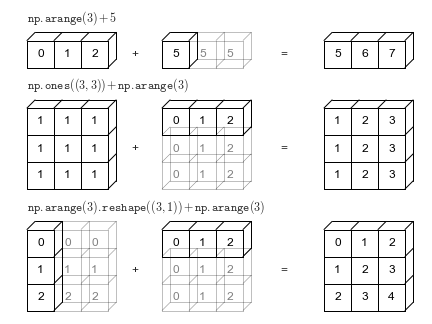

Fig: Broadcasting visualization. Image taken from [J. VanderPlas, Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/02.05-computation-on-arrays-broadcasting.html))

In [7]:
six, three

(array([[1, 2, 3],
        [4, 5, 6]]),
 array([1, 2, 3]))

In [8]:
six.shape, three.shape

((2, 3), (3,))

In [9]:
six + three

array([[2, 4, 6],
       [5, 7, 9]])

In [10]:
six * three  # elementwise multiplication, *not* matrix-vector.

array([[ 1,  4,  9],
       [ 4, 10, 18]])

In [11]:
col = np.array([[0],[1],[2]])
col

array([[0],
       [1],
       [2]])

In [12]:
col.shape, three.shape

((3, 1), (3,))

In [13]:
col + three

array([[1, 2, 3],
       [2, 3, 4],
       [3, 4, 5]])

### 3.3 Array-wide operations

At the top level, numpy provides a few methods that operate on entire arrays.
* the result depends on all elements at once
    * can't be broken down to an element-wise operation
* we may *reduce* the array to a lower dimension
* a few other operations that don't reduce the dimension also exist

#### 3.3.1 Reductions

These will reduce the number of dimensions of an array
* reduction by at least one, or even down to a scalar.
* can be applied to *all* elements or along a specified axis
* often used reductions:
    * *n*-ary operations (`np.sum`, `np.prod`, `np.all`, `np.any`)
    * statistics (`np.mean`, `np.average`, `np.std`)
    * extreme values (`np.min`, `np.max`, `np.argmin`, `np.argmax`)
* "`nan`-safe" versions exist to deal with `np.nan`
    * `np.nansum`, `np.nanprod`, etc.

In [14]:
square = np.array([[0,1],[2,3]])
square

array([[0, 1],
       [2, 3]])

In [15]:
np.sum(square)

6

In [16]:
square.sum()

6

In [17]:
np.sum(square, axis=0)

array([2, 4])

In [18]:
np.sum(square, axis=1)

array([1, 5])

In [19]:
np.mean(square)

1.5

In [20]:
np.std(square)

1.118033988749895

In [21]:
np.std(square, axis=1)

array([0.5, 0.5])

In [22]:
square_bol = square != 2
square_bol

array([[ True,  True],
       [False,  True]])

In [23]:
np.all(square_bol)

False

In [24]:
np.all(square_bol, axis=1)

array([ True, False])

In [25]:
np.max(square)

3

In [26]:
np.argmax(square)

3

#### 3.3.2 Other array-wide operations

* `np.cumsum` and `np.cumprod` for cumulative sum and product, respectively
* `np.swapaxes`, `np.sort`, `np.partition` reorder elements (the latter two in-place)

In [27]:
a = np.arange(1,11)
a

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [28]:
np.cumsum(a)

array([ 1,  3,  6, 10, 15, 21, 28, 36, 45, 55])

In [29]:
np.cumprod(a)

array([      1,       2,       6,      24,     120,     720,    5040,
         40320,  362880, 3628800])

In [30]:
square, np.cumsum(square)

(array([[0, 1],
        [2, 3]]),
 array([0, 1, 3, 6]))

In [31]:
np.cumprod(square)

array([0, 0, 0, 0])

In [32]:
np.cumprod(square, axis=1)

array([[0, 0],
       [2, 6]])

In [33]:
square.swapaxes(1, 0)

array([[0, 2],
       [1, 3]])

In [34]:
a = np.sin(np.arange(10))
a

array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ,
       -0.95892427, -0.2794155 ,  0.6569866 ,  0.98935825,  0.41211849])

In [35]:
a.sort()
a

array([-0.95892427, -0.7568025 , -0.2794155 ,  0.        ,  0.14112001,
        0.41211849,  0.6569866 ,  0.84147098,  0.90929743,  0.98935825])

#### 3.3.3 Reductions with `ufuncs`

(Only) binary `ufuncs` have methods `.reduce` and `.accumulate`
* `.reduce` provide a scalar result
    * `np.add.reduce` is equivalent to `np.sum`
    * `np.multiply.reduce` is equivalent to `np.prod`
* `.accumulate` leave  along the way
    * `np.add.accumulate` is equivalent to `np.cumsum`
    * `np.multiply.accumulate` is equivalent to `np.cumprod`


In [36]:
a = np.arange(2, 5)
a, np.multiply.accumulate(a), np.multiply.reduce(a)

(array([2, 3, 4]), array([ 2,  6, 24]), 24)

In [37]:
np.power.accumulate(a)

array([   2,    8, 4096])

### 3.4 Outer product

Binary `ufunc`s also have the `.outer` method
* e.g. `np.multiply.outer` is an *outer product*
* evaluates at each *pair* of inputs
* useful for constructing tables

In [38]:
np.multiply.outer(np.arange(1, 6), np.arange(1, 6))

array([[ 1,  2,  3,  4,  5],
       [ 2,  4,  6,  8, 10],
       [ 3,  6,  9, 12, 15],
       [ 4,  8, 12, 16, 20],
       [ 5, 10, 15, 20, 25]])

In [39]:
np.logical_xor.outer((False, True), (False, True))

array([[False,  True],
       [ True, False]])

In [40]:
np.equal.outer(np.arange(8), np.arange(1, 5))

array([[False, False, False, False],
       [ True, False, False, False],
       [False,  True, False, False],
       [False, False,  True, False],
       [False, False, False,  True],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False]])

In [41]:
np.equal.outer(np.arange(8), np.arange(8)).astype(int)

array([[1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 1]])

### 3.5 Tasks

##### **1.**  When we take the sine of all integers from 0 to 100, where do we hit the minimum value and which value is that?

In [52]:
a = np.sin(np.arange(101))
np.min(a), np.argmin(a)

(-0.9999902065507034, 11)

##### **2.** For machine learning, features often need to be normalized. Normalize the columns of the array `e = np.arange(10).reshape((5, 2))`  to have 0 mean and unit variance (standard deviation of 1). (Note: we will learn about `reshape` later)

In [54]:
e = np.arange(10).reshape((5, 2))
e_norm = (e - e.mean(axis=0)) / e.std(axis=0)
e_norm, e_norm.mean(axis=0), e_norm.std(axis=0)


(array([[-1.41421356, -1.41421356],
        [-0.70710678, -0.70710678],
        [ 0.        ,  0.        ],
        [ 0.70710678,  0.70710678],
        [ 1.41421356,  1.41421356]]),
 array([0., 0.]),
 array([1., 1.]))

## 4 Indexing and Slicing

### 4.1 Basic Indexing and slicing in 1D

For basic indexing of one-dimensional arrays, we already start to see some differences to builtin Python (e.g. `list`) slices.

#### 4.1.1 Access and modification

This is like Python lists. Nothing to see here. We may access with positive or negative integers and modify values.

In [55]:
A = np.array([10, 20, 30])
A[0]

10

In [56]:
A[2] = 222
A

array([ 10,  20, 222])

In [57]:
A[-1]

222

#### 4.1.2 Slicing

We can also access elements with slices.
* slice notation functions as in standard Python: `array[start:stop:step]`
    * default values are `start=0`, `stop=len(array)`, `step=1`
    * second colon (`:`) is optional if default `step=1` is used
    * indices start at 0, `stop` is exclusive

* assignment to slices is richer than in Python
    * new value can be scalar

In [58]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [59]:
f'{a[0:6:1], a[0:6:], a[0:6], a[:6]}'  # all these are equivalent

'(array([0, 1, 2, 3, 4, 5]), array([0, 1, 2, 3, 4, 5]), array([0, 1, 2, 3, 4, 5]), array([0, 1, 2, 3, 4, 5]))'

In [60]:
a[:-2]

array([0, 1, 2, 3, 4, 5, 6, 7])

In [61]:
a[1::2]

array([1, 3, 5, 7, 9])

In [62]:
a[::-1]

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

In [63]:
a[3:1:-1]

array([3, 2])

**Let's make a prime sieve:**

In [64]:
a = np.ones(20, dtype=bool)
a[0:2] = False
a

array([False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [66]:
for (idx,), val in np.ndenumerate(a):
    if val:
        a[2 * idx :: idx] = False
a

Just put in a function (Note: the algorithm can be optimized, which we omit here):

In [75]:
def prime_sieve(n):
    sieve = np.ones(n, dtype=bool)
    sieve[0:2] = False
    for (idx,), val in np.ndenumerate(sieve):
        if val:
            sieve[2 * idx :: idx] = False
    return sieve


prime_sieve(20)

array([False, False,  True,  True, False,  True, False,  True, False,
       False, False,  True, False,  True, False, False, False,  True,
       False,  True])

In [76]:
size = 1000
sieve = prime_sieve(size)

Now we want to get a list of the prime numbers within the interval:

In [77]:
np.array([idx for idx, x in enumerate(sieve) if x])

array([  2,   3,   5,   7,  11,  13,  17,  19,  23,  29,  31,  37,  41,
        43,  47,  53,  59,  61,  67,  71,  73,  79,  83,  89,  97, 101,
       103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167,
       173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239,
       241, 251, 257, 263, 269, 271, 277, 281, 283, 293, 307, 311, 313,
       317, 331, 337, 347, 349, 353, 359, 367, 373, 379, 383, 389, 397,
       401, 409, 419, 421, 431, 433, 439, 443, 449, 457, 461, 463, 467,
       479, 487, 491, 499, 503, 509, 521, 523, 541, 547, 557, 563, 569,
       571, 577, 587, 593, 599, 601, 607, 613, 617, 619, 631, 641, 643,
       647, 653, 659, 661, 673, 677, 683, 691, 701, 709, 719, 727, 733,
       739, 743, 751, 757, 761, 769, 773, 787, 797, 809, 811, 821, 823,
       827, 829, 839, 853, 857, 859, 863, 877, 881, 883, 887, 907, 911,
       919, 929, 937, 941, 947, 953, 967, 971, 977, 983, 991, 997])

other way:

In [78]:
np.nonzero(sieve)

(array([  2,   3,   5,   7,  11,  13,  17,  19,  23,  29,  31,  37,  41,
         43,  47,  53,  59,  61,  67,  71,  73,  79,  83,  89,  97, 101,
        103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167,
        173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239,
        241, 251, 257, 263, 269, 271, 277, 281, 283, 293, 307, 311, 313,
        317, 331, 337, 347, 349, 353, 359, 367, 373, 379, 383, 389, 397,
        401, 409, 419, 421, 431, 433, 439, 443, 449, 457, 461, 463, 467,
        479, 487, 491, 499, 503, 509, 521, 523, 541, 547, 557, 563, 569,
        571, 577, 587, 593, 599, 601, 607, 613, 617, 619, 631, 641, 643,
        647, 653, 659, 661, 673, 677, 683, 691, 701, 709, 719, 727, 733,
        739, 743, 751, 757, 761, 769, 773, 787, 797, 809, 811, 821, 823,
        827, 829, 839, 853, 857, 859, 863, 877, 881, 883, 887, 907, 911,
        919, 929, 937, 941, 947, 953, 967, 971, 977, 983, 991, 997]),)

In [79]:
%timeit np.array([idx for idx, x in enumerate(sieve) if x])
%timeit np.nonzero(sieve)

56.6 µs ± 1.81 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
1.72 µs ± 27.5 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [80]:
primes = np.nonzero(sieve)

double check:

In [81]:
sieve[primes]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

#### 4.1.3 Tasks

##### **1.** Create an ndarray named count with integers 1 through 20. Then set all entries with even integers to zero.

In [86]:
count = np.arange(1,21)
count[1::2] = 0
count

array([ 1,  0,  3,  0,  5,  0,  7,  0,  9,  0, 11,  0, 13,  0, 15,  0, 17,
        0, 19,  0])

##### **2.** Swap the first and last value of `count`.

In [87]:
count[0], count[-1] = count[-1], count[0]
count

array([ 0,  0,  3,  0,  5,  0,  7,  0,  9,  0, 11,  0, 13,  0, 15,  0, 17,
        0, 19,  1])

##### **3.** Starting from `np.arange(8)`, use slicing to get an array named `odd` with values 1, 3, 5, 7.

In [98]:
odd = np.arange(8)[1::2]
odd


array([1, 3, 5, 7])

##### **4.** Create an array named `alt_count` with entries `[0, 1, 0, 2, 0, 3]`. Use the functions `np.zeros()`, `np.arange()`, and slicing.

In [99]:
alt_count = np.zeros(40, dtype=int)
alt_count[1::2] = np.arange(1,21) 
alt_count

array([ 0,  1,  0,  2,  0,  3,  0,  4,  0,  5,  0,  6,  0,  7,  0,  8,  0,
        9,  0, 10,  0, 11,  0, 12,  0, 13,  0, 14,  0, 15,  0, 16,  0, 17,
        0, 18,  0, 19,  0, 20])

### 4.2 Basic indexing and slicing in N dimensions

`ndarray`s can natively be accessed across dimensions.
* in Python, we'd have to use nested lists: `b[i][j]`
    * can't slice outer index
    * slow access
* numpy allows (and recommends!) access with (elements from) a *tuple of indices*:
    * syntax: `b[i, j]` or `b[(i, j)]`
    * this is much faster (and nicer) than sequential access

#### 4.2.1 Adressing analogous to 1D 

* both indices may be integers or slices
* can also set to such slices "richly"
    * with scalars
    * with lower-dimensional arrays

In [100]:
b = np.array([[1, 2, 3], [10, 20, 30]])
print(f'{b}, {b.shape = }')

[[ 1  2  3]
 [10 20 30]], b.shape = (2, 3)


In [101]:
b[(0, 1)], b[0, 1]  # equivalent!

(2, 2)

In [102]:
b[:2, :2], b[(slice(None, 2), slice(None, 2))]  # equivalent!

(array([[ 1,  2],
        [10, 20]]),
 array([[ 1,  2],
        [10, 20]]))

In [103]:
b[1, 0::2] = 20
b

array([[ 1,  2,  3],
       [20, 20, 20]])

In [104]:
a = np.arange(1, 25).reshape((4, 6))
a

array([[ 1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12],
       [13, 14, 15, 16, 17, 18],
       [19, 20, 21, 22, 23, 24]])

In [105]:
a[0, 3:-1]

array([4, 5])

In [108]:
a[:2, :2] = [1, 2]
a[-2:, -2:] = [
    [
        1,
    ],
    [
        2,
    ],
]
a

array([[ 1,  2,  3,  4,  5,  6],
       [ 1,  2,  9, 10, 11, 12],
       [13, 14, 15, 16,  1,  1],
       [19, 20, 21, 22,  2,  2]])

#### 4.2.2 Addressing entire dimensions

In n dimensions, we may include some dimensions completely
* get an *entire* dimension with the empty slice (`:`)
    * selects all elements from the specified axis
* get even more entire dimensions with ellipses (`...`)
    * select all elements from all axes which might otherwise need one `:` each
    * must be unambiguous, e.g. `(..., 1, ...)` is not

In [109]:
a

array([[ 1,  2,  3,  4,  5,  6],
       [ 1,  2,  9, 10, 11, 12],
       [13, 14, 15, 16,  1,  1],
       [19, 20, 21, 22,  2,  2]])

In [110]:
a[:, -1], a[-1, :]

(array([ 6, 12,  1,  2]), array([19, 20, 21, 22,  2,  2]))

In [111]:
a[::2, 3::2]

array([[ 4,  6],
       [16,  1]])

In [112]:
four_d = a.reshape(3, 2, 4)
four_d

array([[[ 1,  2,  3,  4],
        [ 5,  6,  1,  2]],

       [[ 9, 10, 11, 12],
        [13, 14, 15, 16]],

       [[ 1,  1, 19, 20],
        [21, 22,  2,  2]]])

In [117]:
four_d[..., -1]

array([[ 4,  2],
       [12, 16],
       [20,  2]])

In [118]:
four_d[-1, ..., 1]

array([ 1, 22])

#### 4.2.3 Tasks

##### **1.** Create a 8x8 array named `border` with zeros in the interior and ones at the "border" elements.

In [116]:
border = np.zeros((8, 8), dtype=int)
border[::7,:] = 1
border [:,::7] = 1
border

array([[1, 1, 1, 1, 1, 1, 1, 1],
       [1, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 1],
       [1, 1, 1, 1, 1, 1, 1, 1]])

##### **2.** Create an 8x8 array named `check` with a checkerboard pattern of 0 and 1.

In [121]:
check = np.zeros((8, 8), dtype=int)
check[::2,::2] = 1
check[1::2,1::2] = 1
check

array([[1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1]])

### 4.3 Advanced indexing in 1D

* Numpy allows using arrays to index other arrays
    * integer dtype: Select at these indices
    * boolean dtype: Select all where entry is `true`

* also called "fancy indexing", allows finely controlled access
    * when modifying data, operates in-place (like a view)
    * when extracting data, returns a *copy*

#### 4.3.1 Indexing with integers

pass an array or list of integers
* of any length (in particular: longer than original array)
* in any order (in particular: repeat indices)
* if we pass an `ndarray`: We'll get an array of the same shape out

In [3]:
countdown = np.arange(10, -1, -1)
countdown

array([10,  9,  8,  7,  6,  5,  4,  3,  2,  1,  0])

In [4]:
steps = countdown[[0, 3, 8, -1]]  # note the indexing by a list!
steps

array([10,  7,  2,  0])

In [5]:
countdown[[0, 8, -1]] = [100, -10, 30]  # this *does* change the array!
countdown

array([100,   9,   8,   7,   6,   5,   4,   3, -10,   1,  30])

In [6]:
indices = np.random.randint(0,10,50)
indices

array([8, 9, 0, 8, 2, 4, 7, 7, 7, 4, 6, 5, 2, 1, 3, 2, 0, 3, 4, 4, 9, 2,
       1, 3, 1, 9, 6, 0, 1, 5, 5, 5, 4, 1, 3, 6, 6, 8, 0, 9, 2, 0, 6, 0,
       3, 2, 8, 4, 7, 2])

In [7]:
countdown[indices]

array([-10,   1, 100, -10,   8,   6,   3,   3,   3,   6,   4,   5,   8,
         9,   7,   8, 100,   7,   6,   6,   1,   8,   9,   7,   9,   1,
         4, 100,   9,   5,   5,   5,   6,   9,   7,   4,   4, -10, 100,
         1,   8, 100,   4, 100,   7,   8, -10,   6,   3,   8])

In [8]:
indices = np.array([[0, 1], [5, -1]])
indices

array([[ 0,  1],
       [ 5, -1]])

In [9]:
countdown[indices]

array([[100,   9],
       [  5,  30]])

In [10]:
countdown[[0, 0, 1, 1, 1]] = [1, 2, 3, 4, 5]
countdown

array([  2,   5,   8,   7,   6,   5,   4,   3, -10,   1,  30])

#### 4.3.2 Indexing with Boolean masks

A "Boolean Mask" for a given one-dimensional array is...
* an array with the same length
* of `dtype` boolean
* typically created with *comparison* operators between arrays
    * `==`, `!=`, `>`, `<`, `<=`, `>=`
* often processed (or combined) with *bitwise* operators
    * `&`, `|`, `^`, `~`
* then used for indexing

In [11]:
a = np.arange(8)
mask = np.array(4 * [True, False])
a, mask

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 array([ True, False,  True, False,  True, False,  True, False]))

In [12]:
a[mask]

array([0, 2, 4, 6])

In [13]:
A = np.array([1, 2, 3])
B = np.array([3, 2, 1])
mask = A == B
mask

array([False,  True, False])

In [14]:
A[mask], B[mask]

(array([2]), array([2]))

In [15]:
# Example: Select all squares smaller than 20
squares = np.arange(-10, 10) ** 2
squares

array([100,  81,  64,  49,  36,  25,  16,   9,   4,   1,   0,   1,   4,
         9,  16,  25,  36,  49,  64,  81])

In [16]:
mask = [squares[i] < 20 for i in range(squares.size)]
mask

[False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False]

In [17]:
squares[mask]

array([16,  9,  4,  1,  0,  1,  4,  9, 16])

**simpler:**

In [18]:
squares < 20

array([False, False, False, False, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
       False, False])

In [19]:
squares[squares < 20]

array([16,  9,  4,  1,  0,  1,  4,  9, 16])

In [20]:
# Select all squares between 4 and 20
squares[4 < squares < 20]  # this does not work

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [21]:
# We can use bitwise operators to combine Boolean masks
squares[(squares > 4) & (squares < 20)]

array([16,  9,  9, 16])

#### 4.3.3 Tasks

##### **1.** Repeatedly overwrite the array a = np.arange(1, 12) % 11 by indexing it with itself. What happens?

In [25]:
a = np.arange(1, 12) % 11
b = input("Enter a number: ")
for i in range(eval(b)):
    a = a[a]
    print(f"{i}: {a}")

0: [ 2  3  4  5  6  7  8  9 10  0  1]
1: [ 4  5  6  7  8  9 10  0  1  2  3]
2: [ 8  9 10  0  1  2  3  4  5  6  7]


##### **2.** Array FizzBuzz. Take `b = np.arange(100)`. If values are dividable by 3, replace them with `-3` ("Fizz"). If they are dividable by 5, replace them with `-5` ("Buzz"). If they are dividable by both, replace with `-35` ("FizzBuzz"). Use Boolean masks.

In [39]:
b = np.arange(100)
mask3 = b % 3 == 0
mask5 = b % 5 == 0
mask35 = mask3 & mask5
b[mask3] = -3
b[mask5] = -5
b[mask35] = -35
b

array([-35,   1,   2,  -3,   4,  -5,  -3,   7,   8,  -3,  -5,  11,  -3,
        13,  14, -35,  16,  17,  -3,  19,  -5,  -3,  22,  23,  -3,  -5,
        26,  -3,  28,  29, -35,  31,  32,  -3,  34,  -5,  -3,  37,  38,
        -3,  -5,  41,  -3,  43,  44, -35,  46,  47,  -3,  49,  -5,  -3,
        52,  53,  -3,  -5,  56,  -3,  58,  59, -35,  61,  62,  -3,  64,
        -5,  -3,  67,  68,  -3,  -5,  71,  -3,  73,  74, -35,  76,  77,
        -3,  79,  -5,  -3,  82,  83,  -3,  -5,  86,  -3,  88,  89, -35,
        91,  92,  -3,  94,  -5,  -3,  97,  98,  -3])

##### **3.** Array FizzBuzz. Take `b = np.arange(100)`. If values contain the digit 3, replace them with `-3` ("Fizz"). If they contain the digit 5, replace them with `-5` ("Buzz"). If they contain both, replace with `-35` ("FizzBuzz"). Use Boolean masks.

In [42]:
b = np.arange(100)
mask3 = (b % 10 == 3) | (b // 10 == 3)	
mask5 = (b % 10 == 5) | (b // 10 == 5)
mask35 = mask3 & mask5
b[mask3] = -3
b[mask5] = -5
b[mask35] = -35
b

array([  0,   1,   2,  -3,   4,  -5,   6,   7,   8,   9,  10,  11,  12,
        -3,  14,  -5,  16,  17,  18,  19,  20,  21,  22,  -3,  24,  -5,
        26,  27,  28,  29,  -3,  -3,  -3,  -3,  -3, -35,  -3,  -3,  -3,
        -3,  40,  41,  42,  -3,  44,  -5,  46,  47,  48,  49,  -5,  -5,
        -5, -35,  -5,  -5,  -5,  -5,  -5,  -5,  60,  61,  62,  -3,  64,
        -5,  66,  67,  68,  69,  70,  71,  72,  -3,  74,  -5,  76,  77,
        78,  79,  80,  81,  82,  -3,  84,  -5,  86,  87,  88,  89,  90,
        91,  92,  -3,  94,  -5,  96,  97,  98,  99])

##### **4.** How many squares of integers between 0 and 100 have "6" as their second-lowest ("tens") digit?

In [47]:
squares = np.arange(0, 101) ** 2
summe = np.size(squares[(squares//10)%10 == 6])
squares[(squares//10)%10 == 6], summe


(array([  64,  169,  361,  961, 1369, 1764, 3364, 3969, 4761, 6561, 7569,
        8464]),
 12)

### 4.4 Advanced indexing in more than one dimension

* Multiple indices are broadcast together
    * along same indices: Form pairs of indices
    * across different indices: Form all combinations
* we can combine basic and fancy indexing
* we can combine different kinds of fancy indexing

In [48]:
a = np.arange(1, 25).reshape(4, 6)
a

array([[ 1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12],
       [13, 14, 15, 16, 17, 18],
       [19, 20, 21, 22, 23, 24]])

In [49]:
rows = np.array([0, 3])
a[rows, :]

array([[ 1,  2,  3,  4,  5,  6],
       [19, 20, 21, 22, 23, 24]])

In [50]:
cols = np.array([1, 2])
a[:, cols]

array([[ 2,  3],
       [ 8,  9],
       [14, 15],
       [20, 21]])

In [51]:
a[rows, cols]

array([ 2, 21])

This means it's the elements that are a combination of the arrays rows = [0,3] and cols = [1,2] and thus (0,1) and (3,2):

In [52]:
a[0,1], a[3,2]

(2, 21)

In order to get the sub-matrix selected by rows and cols there are two options: 

In [53]:
a[rows,:][:,cols]

array([[ 2,  3],
       [20, 21]])

Other option with `newaxis`

In [54]:
cols, cols[:, np.newaxis]

(array([1, 2]),
 array([[1],
        [2]]))

Hint: this is similar to broadcasting in aritmetics: 

In [55]:
rows + cols, rows + cols[:, np.newaxis]

(array([1, 5]),
 array([[1, 4],
        [2, 5]]))

In [56]:
a[rows, cols[:, np.newaxis]]

array([[ 2, 20],
       [ 3, 21]])

Example for **boolean masks**:

In [57]:
a

array([[ 1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12],
       [13, 14, 15, 16, 17, 18],
       [19, 20, 21, 22, 23, 24]])

In [58]:
row_mask, col_mask = np.all(a % 10, axis=1), np.all(a % 10, axis=0)
row_mask, col_mask

(array([ True, False,  True, False]),
 array([ True, False,  True, False,  True,  True]))

In [59]:
a[row_mask, :]

array([[ 1,  2,  3,  4,  5,  6],
       [13, 14, 15, 16, 17, 18]])

In [60]:
a[:, col_mask]

array([[ 1,  3,  5,  6],
       [ 7,  9, 11, 12],
       [13, 15, 17, 18],
       [19, 21, 23, 24]])

In [61]:
a[row_mask,col_mask]

IndexError: shape mismatch: indexing arrays could not be broadcast together with shapes (2,) (4,) 

In [62]:
a[row_mask, :][:,col_mask]

array([[ 1,  3,  5,  6],
       [13, 15, 17, 18]])

Note: the other option with `newaxis`ist not working, because np tries to construct indecis, which are here just (True, False) or (False,False) etc. that cannot be used for indexing.

##### 4.4.1 Tasks

##### **1.** What values do `a` and `b` hold after this snippet, and why? What is the "correct" way to do it?
```python
a, b = np.eye(3), np.eye(3)
mask = [True, False, False]
index = 0
a[mask][index] = 2
b[index][mask] = 2
```

In [63]:
a, b = np.eye(3), np.eye(3)
mask = [True, False, False]
index = 0
a[mask][index] = 2
b[index][mask] = 2
a, b

(array([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]]),
 array([[2., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]]))

## 5 Views and Copies

`ndarray`s are *mutable*. Numpy saves memory by creating *references* to original data upon slicing or transposing. This has important implications.
* slicing or transposing creates a **view** and *not* a copy of the original array
    * only creates new metadata, points to the same data
    * we can overwrite data in the original array!
* Numpy can check whether two arrays share memory
    * `np.may_share_memory()` uses heuristics and may give false positives
    * `np.shares_memory()` is exact but "may be exponentially slow"
* we can create actual copies with the `.copy()` method
* when slices of existing arrays are modified, data is copied as well

In [64]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [65]:
b = a
b

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [66]:
b[5] = 23
b

array([ 0,  1,  2,  3,  4, 23,  6,  7,  8,  9])

In [67]:
a

array([ 0,  1,  2,  3,  4, 23,  6,  7,  8,  9])

In [68]:
np.shares_memory(a,b)

True

Now with copy:

In [69]:
b = a.copy()

In [70]:
b[5] = 42
b

array([ 0,  1,  2,  3,  4, 42,  6,  7,  8,  9])

In [71]:
a

array([ 0,  1,  2,  3,  4, 23,  6,  7,  8,  9])

In [72]:
np.shares_memory(a,b)

False

Now with **slicing:**

In [73]:
integers = np.arange(5)
evens = integers[::2]

In [74]:
integers, evens

(array([0, 1, 2, 3, 4]), array([0, 2, 4]))

In [75]:
evens[0] = 6
integers, evens

(array([6, 1, 2, 3, 4]), array([6, 2, 4]))

In [76]:
np.shares_memory(integers, evens), np.may_share_memory(integers, evens)

(True, True)

In [77]:
integers[::2] = 4
integers, evens

(array([4, 1, 4, 3, 4]), array([4, 4, 4]))

With copy:

In [78]:
copied_evens = integers[::2].copy()
np.shares_memory(integers, copied_evens)

False

In [79]:
copied_evens[0] = 100
integers, copied_evens

(array([4, 1, 4, 3, 4]), array([100,   4,   4]))

However:

In [80]:
integers = np.arange(5)
evens = np.array([0,0,0])
integers, evens

(array([0, 1, 2, 3, 4]), array([0, 0, 0]))

In [81]:
evens[:] = integers[::2]  # values are copied, only possible if shapes fit
integers, evens

(array([0, 1, 2, 3, 4]), array([0, 2, 4]))

In [82]:
evens[0] = 6
integers, evens

(array([0, 1, 2, 3, 4]), array([6, 2, 4]))

In [83]:
np.shares_memory(integers, evens), np.may_share_memory(integers, evens)

(False, False)

#### 5.1 Tasks

##### **1.** Create an array with integers from 0 to 10. Slice the `even` and `odd` integers into such-named arrays. Check if these arrays `may_share_memory`, and if they actually do.

In [86]:
num = np.arange(11)
even = num[::2]
odd = num[1::2]
np.may_share_memory(even, odd), np.shares_memory(even, odd)

(True, False)

##### **2.** Carsten wants to symmetrize his tensor `c` of rank 3 as follows:
```python
c = np.arange(8).reshape((2, 2, 2))
first_permutation = np.transpose(c, axes=(1, 2, 0))
second_permutation = np.transpose(c, axes=(2, 0, 1))
c += first_permutation
c += second_permutation
```
The result is not what he expected. Why not and what can he improve?

In [93]:
c = np.arange(8).reshape((2, 2, 2))
first_permutation = np.transpose(c, axes=(1, 2, 0)).copy()
second_permutation = np.transpose(c, axes=(2, 0, 1)).copy()
c += first_permutation
c += second_permutation
c

array([[[ 0,  7],
        [ 7, 14]],

       [[ 7, 14],
        [14, 21]]])

In [95]:
c = np.arange(8).reshape((2, 2, 2))
symmetrized = sum(np.transpose(c, axes=perm) for perm in [(0, 1, 2), (1, 2, 0), (2, 0, 1)])
symmetrized

array([[[ 0,  7],
        [ 7, 14]],

       [[ 7, 14],
        [14, 21]]])

## 6 Array shape

To deal with large amounts of data efficiently, numpy stores data and metadata separately.
* actual values are stored contiguously (if possible)
    * `.data` points to a memory location where data block starts
* metadata explains how the data shall be interpreted
    * see above for explanation on `.shape`, `.dtype`, `.flags`
    * these can be manipulated *independently* of the data

### 6.1 Shape manipulation

We can manipulate the shape of arrays to change how the data represents arrays of different dimensions.
* `.shape` is stored as a tuple: number of entries in each dimension
* `.reshape` is a method that casts arrays to a given shape
* `.T` is an attribute (!) that holds the transformed version of a 2D array
* `np.newaxis`creates a new axis and thus change shape
* reshaped (but not regenerated!) arrays may share memory to hold the data
    * can have weird effects not unlike (mutable) lists

#### 6.1.1 Reshaping

In [96]:
a = np.arange(16)

In [97]:
a, a.shape

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 (16,))

In [98]:
a = a.reshape((2, 8))
a, a.shape

(array([[ 0,  1,  2,  3,  4,  5,  6,  7],
        [ 8,  9, 10, 11, 12, 13, 14, 15]]),
 (2, 8))

In [99]:
a = a.reshape((2, 2, 2, 2))
a, a.shape

(array([[[[ 0,  1],
          [ 2,  3]],
 
         [[ 4,  5],
          [ 6,  7]]],
 
 
        [[[ 8,  9],
          [10, 11]],
 
         [[12, 13],
          [14, 15]]]]),
 (2, 2, 2, 2))

In [100]:
a = a.ravel()  # = a.reshape((a.size,))
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [101]:
b = a.reshape((4, 4))
a, b

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 array([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15]]))

In [102]:
b[3,2] = 42
a, b

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 42, 15]),
 array([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 42, 15]]))

In [103]:
np.shares_memory(a, b)

True

#### 6.1.2 Transpose

In [104]:
c = b.T
c

array([[ 0,  4,  8, 12],
       [ 1,  5,  9, 13],
       [ 2,  6, 10, 42],
       [ 3,  7, 11, 15]])

In [105]:
c[2,0] = 42
b, c

(array([[ 0,  1, 42,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 42, 15]]),
 array([[ 0,  4,  8, 12],
        [ 1,  5,  9, 13],
        [42,  6, 10, 42],
        [ 3,  7, 11, 15]]))

#### 6.1.3 newaxis

In [106]:
a = np.arange(5)
a

array([0, 1, 2, 3, 4])

In [107]:
b = a[:,np.newaxis]
b, b.shape

(array([[0],
        [1],
        [2],
        [3],
        [4]]),
 (5, 1))

In [108]:
b[2,0] = 42
b, a

(array([[ 0],
        [ 1],
        [42],
        [ 3],
        [ 4]]),
 array([ 0,  1, 42,  3,  4]))

In [109]:
b = a[:,np.newaxis,np.newaxis]
b, b.shape

(array([[[ 0]],
 
        [[ 1]],
 
        [[42]],
 
        [[ 3]],
 
        [[ 4]]]),
 (5, 1, 1))

In [110]:
b = a[np.newaxis,:]
b, b.shape

(array([[ 0,  1, 42,  3,  4]]), (1, 5))

In [111]:
b = a[np.newaxis,:,np.newaxis]
b, b.shape

(array([[[ 0],
         [ 1],
         [42],
         [ 3],
         [ 4]]]),
 (1, 5, 1))

### 6.2 Combination of numpy arrays

* arrays can be combined together

#### 6.2.1 Concatenate

* *concatenate* to append to existing dimensions

In [112]:
b0 = np.zeros(3)
b1 = np.ones(3)

In [113]:
np.concatenate((b0, b1))

array([0., 0., 0., 1., 1., 1.])

In [114]:
b0 = np.zeros((3,3))
b1 = np.ones((3,3))

In [115]:
np.concatenate((b0, b1), axis=0)

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [116]:
c = np.concatenate((b0, b1), axis=1)
c

array([[0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1.]])

In [117]:
b0[0,0] = 42
c

array([[0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1.]])

#### 6.2.2 Stack

* *stack* to generate a new dimension

In [118]:
b0 = np.zeros(3)
b1 = np.ones(3)

In [119]:
np.stack((b0, b1), axis=0)

array([[0., 0., 0.],
       [1., 1., 1.]])

In [120]:
np.stack((b0, b1), axis=1)

array([[0., 1.],
       [0., 1.],
       [0., 1.]])

In [121]:
c = np.stack((b0, b1, b0), axis=1)
c

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [122]:
b0[1] = 42

In [123]:
c

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

#### 6.2.3 Split

* *split* to separate into subarrays

In [124]:
a = np.arange(16).reshape((2, 8))
b, c, d = np.split(a, (1, 3), axis=1)
b, c, d

(array([[0],
        [8]]),
 array([[ 1,  2],
        [ 9, 10]]),
 array([[ 3,  4,  5,  6,  7],
        [11, 12, 13, 14, 15]]))

In [125]:
a[0,1] = 42
b, c, d

(array([[0],
        [8]]),
 array([[42,  2],
        [ 9, 10]]),
 array([[ 3,  4,  5,  6,  7],
        [11, 12, 13, 14, 15]]))

### 6.3 Tasks

##### **1.** Create an ndarray named tens of integers from 0 to 99, grouped by their "tens" digit into a  10×10 -matrix.

In [127]:
a = np.arange(100).reshape(10, 10)
a

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
       [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
       [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
       [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
       [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]])

##### **2.** Create an ndarray named cube labelling the vertices of a unit cube with integers from 0 to 7, by reshapeing an arange. Transpose that array. How does it change?

AxisError: axis 2 is out of bounds for array of dimension 2

##### **3.** How many different arrays can you generate by concatenating or stacking two np.eye(2) unit matrices?